In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util.util import get_root_dir

In [141]:
root_dir = get_root_dir()
proj_dir = root_dir + "/surrogate/plastic_train1/"
df_samples = pd.read_csv(proj_dir + "train1_data/lhs_samples.csv", index_col=0)
df_samples

,Light%,Heavy%,Stages
0,0.394488,0.605512,30.0
1,0.246093,0.753907,20.0
2,0.332149,0.667851,40.0
3,0.351948,0.648052,35.0
4,0.451481,0.548519,40.0
...,...,...,...
495,0.768560,0.231440,30.0
496,0.770177,0.229823,30.0
497,0.615712,0.384288,40.0
498,0.691030,0.308970,30.0


In [142]:
s20_idx = df_samples[df_samples['Stages'] == 20].index
s25_idx = df_samples[df_samples['Stages'] == 25].index
s30_idx = df_samples[df_samples['Stages'] == 30].index
s35_idx = df_samples[df_samples['Stages'] == 35].index
s40_idx = df_samples[df_samples['Stages'] == 40].index

In [143]:
df_outputs = pd.read_csv(proj_dir + "train1_data/result1.csv", header=None)
df_outputs.columns = ["Reflux","Stages","Cond Duty","Reb Duty"]
df_outputs

,Reflux,Stages,Cond Duty,Reb Duty
0,2.347946,30.0,0.122966,0.026960
1,4.225974,20.0,0.121752,0.028958
2,2.851899,40.0,0.119481,0.024824
3,2.676376,35.0,0.120715,0.025630
4,1.947361,40.0,0.123364,0.026125
...,...,...,...,...
495,0.890892,30.0,0.133731,0.029656
496,0.887437,30.0,0.133764,0.029654
497,1.260945,40.0,0.128348,0.027562
498,1.071803,30.0,0.131941,0.029532


In [144]:
def extract_reflux(s_idx):
    s_data = np.zeros((len(s_idx),4))
    c = 0
    for index, row in df_outputs.iterrows():
        if row["Stages"] == 20:
            s_data[c][0] = df_samples['Light%'][index]
            s_data[c][1] = row["Reflux"]
            s_data[c][2] = row["Cond Duty"]
            s_data[c][3] = row["Reb Duty"]
            c += 1
    s_data = s_data[np.argsort(s_data[:, 0])]
    return s_data

s20_data = extract_reflux(s20_idx)
s25_data = extract_reflux(s25_idx)
s30_data = extract_reflux(s30_idx)
s35_data = extract_reflux(s35_idx)
s40_data = extract_reflux(s40_idx)

In [145]:
# s25_data = s25_data[61:]
# s30_data

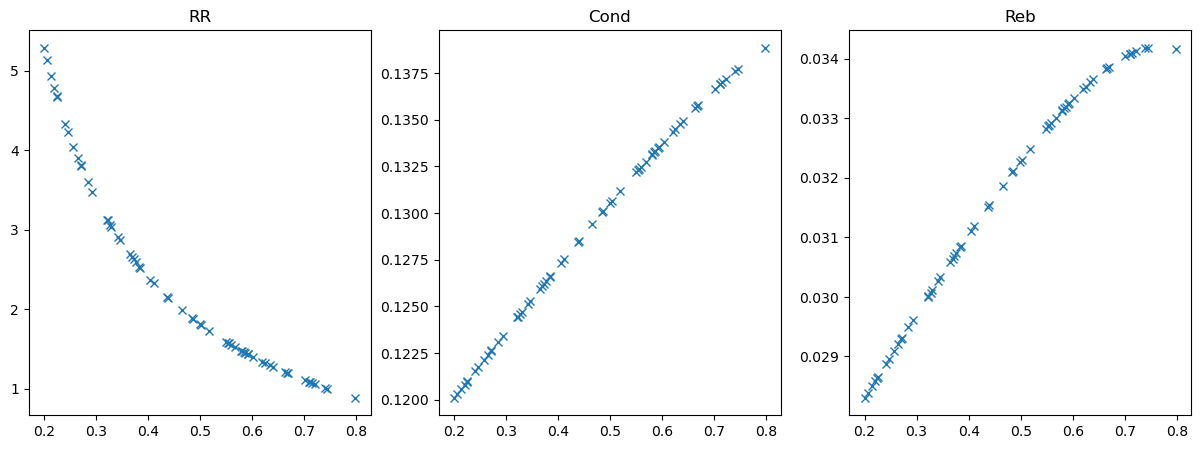

In [146]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot
axs[0].plot(s20_data.T[0], s20_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s20_data.T[0], s20_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s20_data.T[0], s20_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()

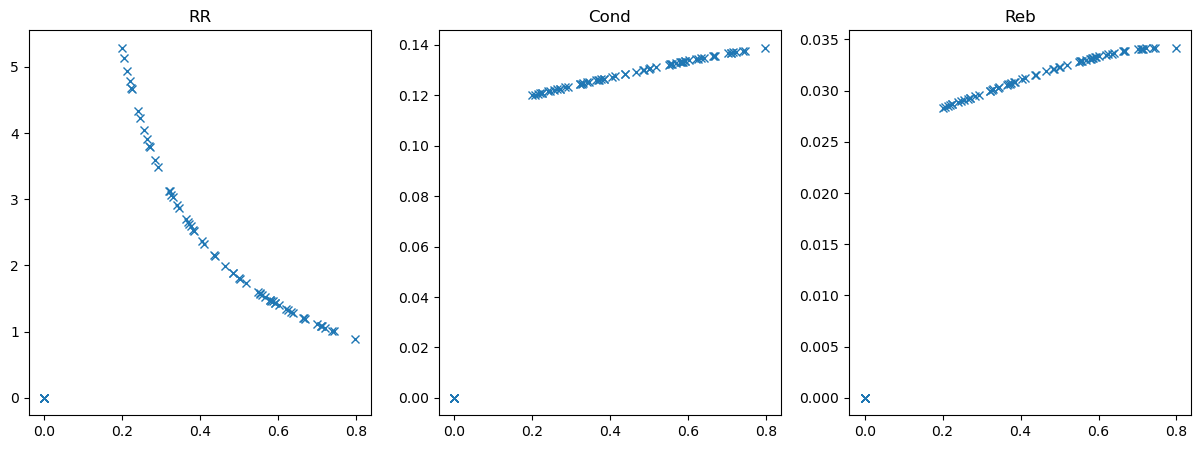

In [147]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot]
axs[0].plot(s25_data.T[0], s25_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s25_data.T[0], s25_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s25_data.T[0], s25_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()

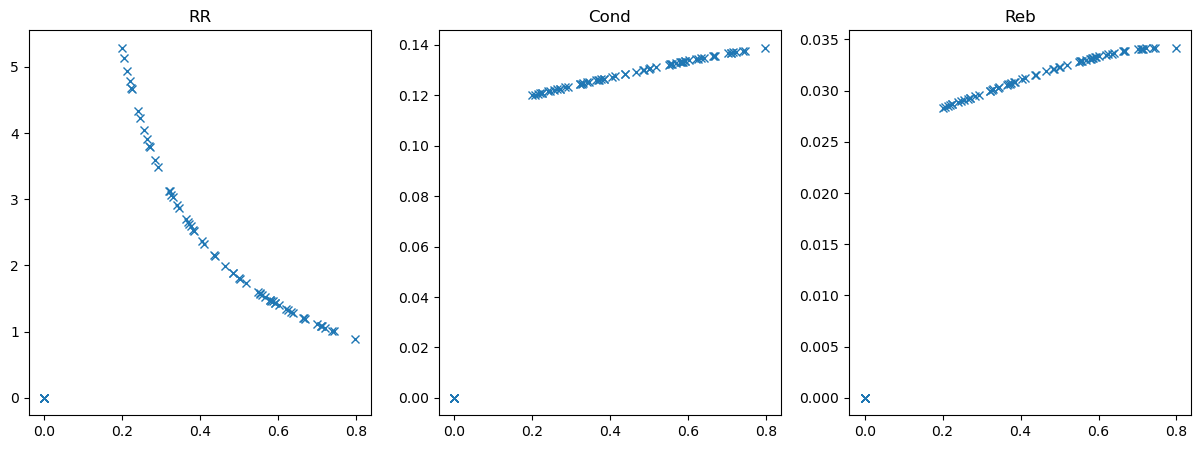

In [148]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot
axs[0].plot(s30_data.T[0], s30_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s30_data.T[0], s30_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s30_data.T[0], s30_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()

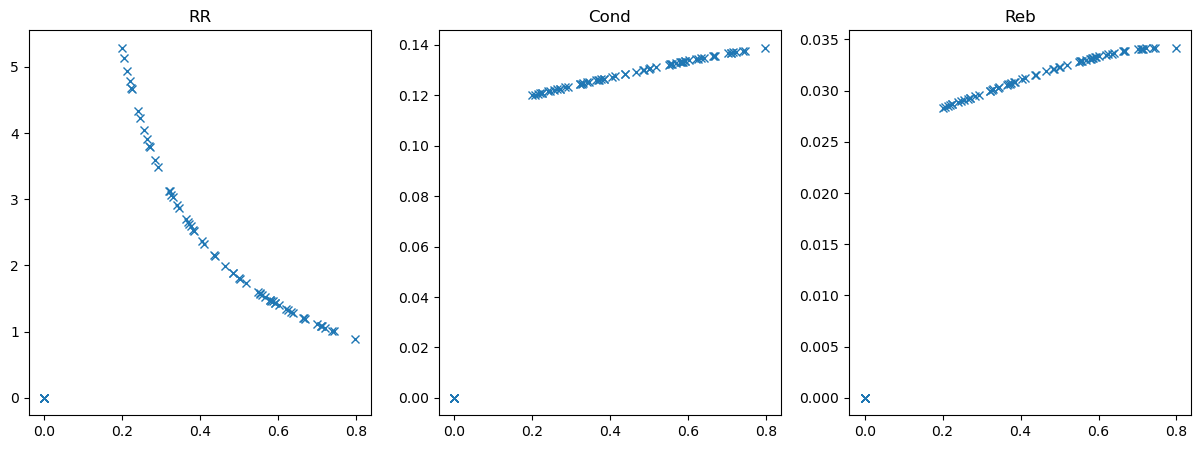

In [149]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot
axs[0].plot(s35_data.T[0], s35_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s35_data.T[0], s35_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s35_data.T[0], s35_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()

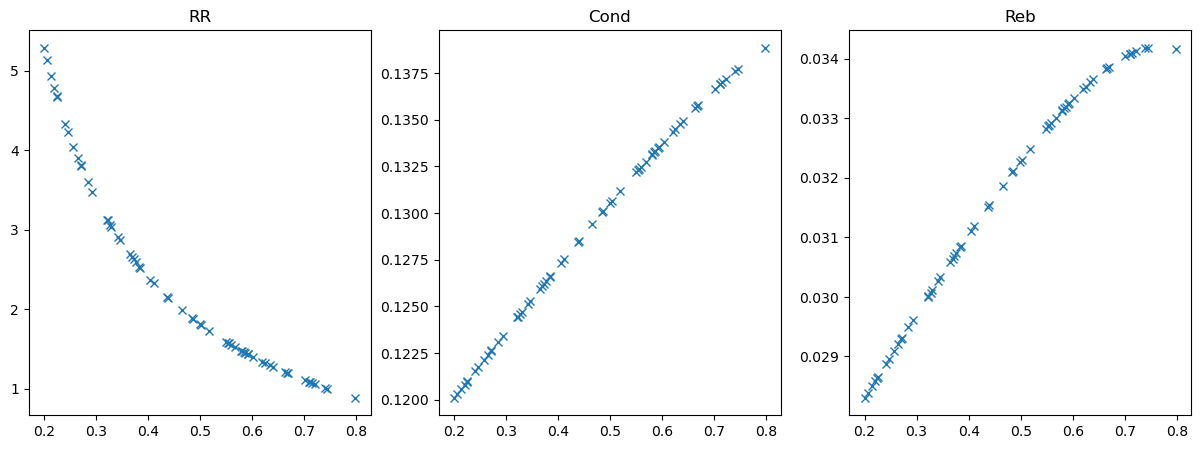

In [150]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot
axs[0].plot(s40_data.T[0], s40_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s40_data.T[0], s40_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s40_data.T[0], s40_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()